In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import random as rnd
import os
import math

# required for interactive plotting
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy.polynomial as np_poly

from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

from pprint import pprint
import functools as ft

In [3]:
import notebook
print(notebook.__file__)

/Users/dragon/Library/Python/3.5/lib/python/site-packages/notebook/__init__.py


initialization
$
\newcommand{\Brace}[1]{\left\{#1\right\}}
\newcommand{\Bracket}[1]{\left[#1\right]}
\newcommand{\cases}[1]{\begin{cases}#1\end{cases}}
\newcommand{\cov}[1]{\text{cov} \sigma\left[#1\right]}
\newcommand{\diff}[2]{\frac{d #1}{d #2}}
\newcommand{\difftwo}[2]{\frac{d^2 #1}{d {#2}^2}}
\newcommand{\diffn}[2]{{#1}^{\prime}(#2)}
\newcommand{\E}[1]{\mathbb{E}\left[ #1 \right]}
\newcommand{\expb}[1]{\exp\left\{#1\right\}} 
\newcommand{\EXP}[1]{\exp\left\{#1\right\}} 
\newcommand{\frachalf}[1]{\frac{#1}{2}~}
\newcommand{\fracone}[1]{\frac{1}{#1}~}
\newcommand{\fracrec}[1]{\frac{1}{#1}~}
\newcommand{\half}{\fracone{2}}
\newcommand{\H}[1]{\mathbb{H}\left[#1\right]}
\newcommand{\Int}[2]{\displaystyle \int_{#1}^{#2}~}
\newcommand{\intinfinf}{\Int{-\infty}{\infty}}
\newcommand{\inv}[1]{#1^{-1}}
\newcommand{\invp}[1]{\left({#1}\right)^{-1}}
\newcommand{\KL}[2]{\text{KL}\left(#1 \Vert #2\right)}
\newcommand{\Lim}[1]{\displaystyle \lim_{#1}}
\newcommand{\Ln}[1]{\ln \left\(#1\right\)}
\newcommand{\Lnb}[1]{\ln \left\{#1\right\} }
\newcommand{\Mod}[1]{\left|#1\right|}
\newcommand{\Norm}[1]{\left\lVert #1 \right\rVert}
\newcommand{\Normsqr}[1]{\Norm{#1}^2}
\newcommand{\map}[1]{#1_{\text{MAP}}}
\newcommand{\ml}[1]{#1_{\text{ML}}}
\newcommand{\MI}[1]{\mathcal{I}\left(#1\right)}
\newcommand{\P}{\mathbb{P}}
\newcommand{\Paran}[1]{\left(#1\right)}
\newcommand{\Partial}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\sqrbrkt}[1]{\Bracket{#1}^2}
\newcommand{\sqrbrc}[1]{\Brace{#1}^2}
\newcommand{\trace}[1]{\text{Tr}\left( #1 \right)}
\newcommand{\traceb}[1]{\text{Tr}\left\{#1\right\}}
\newcommand{\underl}[1]{\text{$\underline{#1}$}}
\newcommand{\V}[1]{\mathbb{V}\left[#1\right]}
$
$
\DeclareMathOperator*{\argmin}{arg\,min}
\DeclareMathOperator*{\argmax}{arg\,max}
$
$
\newcommand{\mat}[1]{ \left[ \begin{matrix} #1 \end{matrix} \right] }
\newcommand{\matp}[1]{ \left( \begin{matrix} #1 \end{matrix} \right)}
\newcommand{\mats}[1]{ \begin{matrix}#1\end{matrix} }
\newcommand{\arrthree}[1]{
\begin{array}{rlr} #1 \end{array}}
$

$
\newcommand{\C}{\mathbb{C}}
\newcommand{\Ca}{\mathcal{C}}
\newcommand{\Caone}{\Ca_1}
\newcommand{\Catwo}{\Ca_2}
\newcommand{\Cak}{\Ca_k}
\newcommand{\D}{\mathcal{D}}
\newcommand{\G}{\mathcal{G}}
\newcommand{\I}{\mathcal{I}}
\newcommand{\L}{\mathcal{L}}
\newcommand{\M}{\mathcal{M}}
\newcommand{\N}{\mathbb{N}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\Ra}{\mathcal{R}}
$
$
\newcommand{\commentgray}[1]{\color{gray}{\text{#1}}}
$

sum, product
$
\newcommand{\sumi}{\displaystyle \sum_i}
\newcommand{\sumiD}{\displaystyle \sum_{i=1}^{D}}
\newcommand{\sumiL}{\displaystyle \sum_{i=1}^{L}}
\newcommand{\sumiN}{\displaystyle \sum_{i=1}^{N}}
\newcommand{\sumjD}{\displaystyle \sum_{j=1}^{D}}
\newcommand{\sumjK}{\displaystyle \sum_{j=1}^{K}}
\newcommand{\sumjMl}{\sum_{j=1}^{M-1}}
\newcommand{\sumkK}{\displaystyle \sum_{k=1}^{K}}
\newcommand{\sumkM}{\displaystyle \sum_{k=1}^{M}}
\newcommand{\sumkMl}{\sum_{k=1}^{M-1}}
\newcommand{\summN}{\displaystyle \sum_{m=1}^{N}}
\newcommand{\sumnN}{\displaystyle \sum_{n=1}^{N}}
$
$
\newcommand{\prodi}{\displaystyle \prod_i}
\newcommand{\prodiD}{\displaystyle \prod_{i=1}^{D}}
\newcommand{\prodiL}{\displaystyle \prod_{i=1}^{L}}
\newcommand{\prodiN}{\displaystyle \prod_{i=1}^{N}}
\newcommand{\prodjK}{\displaystyle \prod_{j=1}^{K}}
\newcommand{\prodkK}{\displaystyle \prod_{k=1}^{K}}
\newcommand{\prodmN}{\displaystyle \prod_{m=1}^{N}}
\newcommand{\prodnN}{\displaystyle \prod_{n=1}^{N}}
$

alphabet shortcuts
$
\newcommand{\ab}{\mathbf{a}}
\newcommand{\at}{\ab^T}
\newcommand{\Ab}{\mathbf{A}}
\newcommand{\At}{\Ab^T}
\newcommand{\Ai}{\inv{\Ab}}
\newcommand{\Abjk}{\Ab_{jk}}
\newcommand{\bb}{\mathbf{b}}
\newcommand{\bt}{\bb^T}
\newcommand{\Bb}{\mathbf{B}}
\newcommand{\Bt}{\Bb^T}
\newcommand{\Cb}{\mathbf{C}}
\newcommand{\Cn}{\Cb_{N}}
\newcommand{\Db}{\mathbf{D}}
\newcommand{\fb}{\mathbf{f}}
\newcommand{\fp}{f^{\prime}}
\newcommand{\Hb}{\mathbf{H}}
\newcommand{\hx}{h(\xb)}
\newcommand{\Jb}{\mathbf{J}}
\newcommand{\kb}{\mathbf{k}}
\newcommand{\kt}{\kb^T}
\newcommand{\Kb}{\mathbf{K}}
\newcommand{\Lb}{\mathbf{L}}
\newcommand{\Lt}{\Lb^T}
\newcommand{\Lbi}{\Lb^{-1}}
\newcommand{\mb}{\mathbf{m}}
\newcommand{\mt}{\mb^T}
\newcommand{\mbn}{\mb_N}
\newcommand{\mbnt}{\mbn^T}
\newcommand{\mbN}{\mb_N}
\newcommand{\mbNt}{\mbn^T}
\newcommand{\Mb}{\mathbf{M}}
\newcommand{\Qb}{\mathbf{Q}}
\newcommand{\Rb}{\mathbf{R}}
\newcommand{\sb}{\mathbf{s}}
\newcommand{\Sb}{\mathbf{S}}
\newcommand{\tb}{\mathbf{t}}
\newcommand{\tbnn}{\tb_{N}}
\newcommand{\tbnp}{\tb_{N+1}}
\newcommand{\tt}{\tb^T}
\newcommand{\Tb}{\mathbf{T}}
\newcommand{\Tt}{\Tb^T}
\newcommand{\ub}{\mathbf{u}}
\newcommand{\Ub}{\mathbf{U}}
\newcommand{\Ut}{\Ub^T}
\newcommand{\vb}{\mathbf{v}}
\newcommand{\Vb}{\mathbf{V}}
\newcommand{\wb}{\mathbf{w}}
\newcommand{\wnr}[1]{\wb^{(\text{#1})}}
\newcommand{\wt}{\wb^T}
\newcommand{\Wb}{\mathbf{W}}
\newcommand{\Wt}{\Wb^T}
\newcommand{\Wtilde}{\widetilde{\Wb}}
\newcommand{\Wtildet}{\Wtilde^T}
\newcommand{\Xb}{\mathbf{X}}
\newcommand{\Xt}{\Xb^T}
\newcommand{\Xtilde}{\widetilde{\Xb}}
\newcommand{\Xtildet}{\Xtilde^T}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\xt}{\xb^T}
\newcommand{\xtilde}{\widetilde{\xb}}
\newcommand{\xtilden}{\xtilde_n}
\newcommand{\xtildent}{\xtilden^T}
\newcommand{\xp}{x^{\prime}}
\newcommand{\xbp}{\xb^{\prime}}
\newcommand{\xbm}{\xb_m}
\newcommand{\xbn}{\xb_n}
\newcommand{\xbnp}{\xb_{N+1}}
\newcommand{\xab}{\mathbf{x_a}}
\newcommand{\xabt}{\mathbf{x_a}^T}
\newcommand{\xbb}{\mathbf{x_b}}
\newcommand{\xbbt}{\mathbf{x_b}^T}
\newcommand{\yb}{\mathbf{y}}
\newcommand{\yt}{\yb^T}
\newcommand{\yx}{y(\xb)}
\newcommand{\zb}{\mathbf{z}}
\newcommand{\zt}{\zb^T}
\newcommand{\zbm}{\zb_m}
\newcommand{\zbn}{\zb_n}
\newcommand{\zbnp}{\zb_{n-1}}
\newcommand{\znk}{\zb_{nk}}
\newcommand{\znpj}{\zb_{n-1,j}}
\newcommand{\Zb}{\mathbf{Z}}
$

math shortcuts
$
\newcommand{\alphab}{\boldsymbol{\alpha}}
\newcommand{\chib}{\boldsymbol{\chi}}
\newcommand{\etab}{\pmb{\eta}}
\newcommand{\etat}{\eta^T}
\newcommand{\etabt}{\etab^T}
\newcommand{\Lambdab}{\pmb{\Lambda}}
\newcommand{\laa}{\Lambda_{aa}}
\newcommand{\laai}{\Lambda_{aa}^{-1}}
\newcommand{\lab}{\Lambda_{ab}}
\newcommand{\lba}{\Lambda_{ba}}
\newcommand{\lbb}{\Lambda_{bb}}
\newcommand{\lbbi}{\Lambda_{bb}^{-1}}
\newcommand{\li}{\Lambda^{-1}}
\newcommand{\Li}{\Lambda^{-1}}
\newcommand{\mub}{\pmb{\mu}}
\newcommand{\mut}{\mub^T}
\newcommand{\muab}{\pmb{\mu}_a}
\newcommand{\mubb}{\pmb{\mu}_b}
\newcommand{\Phib}{\pmb{\Phi}}
\newcommand{\Phibt}{\Phib^T}
\newcommand{\pib}{\pmb{\pi}}
\newcommand{\sigmasqr}{\sigma^2}
\newcommand{\saa}{\Sigma_{aa}}
\newcommand{\sab}{\Sigma_{ab}}
\newcommand{\sba}{\Sigma_{ba}}
\newcommand{\sbb}{\Sigma_{bb}}
\newcommand{\Sigmai}{\inv{\Sigma}}
\newcommand{\thetab}{\pmb{\theta}}
\newcommand{\thetat}{\thetab^T}
\newcommand{\thetabh}{\hat{\thetab}}
\newcommand{\thetaold}{\thetab^{\text{old}}}
$
$
\newcommand{\zerob}{\pmb{0}}
\newcommand{\ed}{\mathbb{E}_{\D}}
\newcommand{\edyx}{\ed\left[y(\xb ; \D)\right]}
\newcommand{\dx}{~dx}
\newcommand{\dxb}{~d\xb}
\newcommand{\pxdxb}{p(\xb) \dxb}
\newcommand{\dwb}{~d\wb}
$

aliases for distributions
$\newcommand{\multivarcoeff}{\frac{1}{(2\pi)^{D/2}}
\frac{1}{\left| \mathbf{\Sigma}\right|^{1/2}}}$
$\newcommand{\multivarexp}[2]
{
\left\{
 -\frac{1}{2} 
 {#1}^T 
 #2
 {#1}
\right\}
}$
$\newcommand{\multivarexpx}[1]{\multivarexp{#1}{\Sigma^{-1}}}$
$\newcommand{\multivarexpstd}{\multivarexpx{(\xb-\mub)}}$
$\newcommand{\gam}{\operatorname{Gam}}$
$
\newcommand{\Nl}[3]{\mathcal{N}\left(#1 \mid #2, #3\right)}
\newcommand{\Nstdx}{\Nl{\mathbf{x}}{\mathbf{\mu}}{\Sigma}}
$

# Intro

To apply GP to regression, we need to take account of the noise [??] on target values, given by
$$
t_n = y_n + \epsilon_n ~~ ~~ ~~ y_n = y(\xbn)
$$

We consider noise processes having Gaussian distribution
$$
p(t_n \mid y_n) = \Nl{t_n}{y_n}{\inv{\beta}}
$$

Since the noise is independent, we have
$$
p(\tb \mid \yb) = \Nl{\tb}{\yb}{\inv{\beta}\I_N}
$$

From the definition of GP, we have
$$
p(\yb) = \Nl{\yb}{\zerob}{\Kb}
$$

Since the mean of the marginal is 
$\Nl{t}{\Ab \mub + \bb}{\Lbi + \Ab \Li \At}$, we have

$$
p(\tb) = \Nl{\tb}{\zerob}{\inv{\beta}\I_N + \Kb}
= \Nl{\tb}{\zerob}{\Cb}
$$

where the covariance is
$$
\Cb(\xbn, \xbm) = \inv{\beta} \delta_{nm} + \kappa(\xbn, \xbm)
$$

# Sampling from prior

* Create $\xb_{1:N}$
* Create $\mub = \zerob_N, \mats{\kappa \\ N \times N}$
* $\kappa = \Lb \Lt$
* $\fp \sim \mathcal{N}(\zerob_N, \kappa) \sim \Lb \mathcal{N}(\zerob, \I) $
* since $\V{\Ab \Xb} = \Ab \V{\Xb} \At$
* Hence $\V{\fp} = \Lb \Lt = \kappa$
* so sample from a std gaussian and left-multiply it by $\Lb$, we can sample from $\kappa$

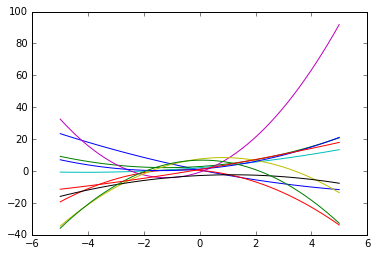

In [38]:
from __future__ import division

def kernel_sqrd_exp(a,b, pmtrs):
    """ GP squared exponential kernel """
    # t1: (n,1) t2: (1,n) t3: (n,n)
    # t1 + t2 => (n, n) with sum of pairs like a grid
    sqdist = a**2 + b.T**2 - 2. * a @ b.T
    return np.exp(-.5 * sqdist)
def kernel_linear(a,b, pmtrs):
    return a @ b.T
def kernel_quadratic(a, b, pmtrs):
    return (a @ b.T + abs(pmtrs[0]))**2

def kernelize(a,b,pmtrs, kernel_type):
    if(kernel_type == 'squared-exp'):
        return kernel_sqrd_exp(a, b, pmtrs)
    elif(kernel_type=='linear'):
        return kernel_linear(a,b, pmtrs)
    elif(kernel_type=='quadratic'):
        return kernel_quadratic(a,b, pmtrs)

def plot_kernel(pmtr1, kernel_type='squared-exp'):
    #number of test points
    n=50
    # test points
    Xtest = np.linspace(-5, 5, n).reshape(-1, 1)
    # kernel at test points
    pmtrs = [pmtr1]
    K_ = kernelize(Xtest, Xtest, pmtrs, kernel_type)

    # draw samples from the prior at our test points
    # $K = L L^T$
    L = np.linalg.cholesky(K_ + 1e-6*np.eye(n))
    n_curves = 10
    f_prior = np.dot(L, np.random.normal(size=(n,n_curves)))
    #print('xtest: ', Xtest.shape, ' f_p: ',f_prior.shape)

    plt.plot(Xtest, f_prior)
    plt.show()

interact(plot_kernel,
         pmtr1=(-10,10,0.1),
         kernel_type=['squared-exp', 'linear', 'quadratic'],
        )

# lets make ourselves some predictions

$$
\tbnn = \mat{t_1 \\ \vdots \\ t_N}
$$

Goal: to predict $t_{N+1}$

Lets consider the joint distribution $p(\tbnn, t_{N+1})$ or shortly $p(\tbnp)$. this as mentioned above is
$$
p(\tbnp) = \Nl{\tb}{\zerob}{\Cb_{N+1}}
$$

lets split the covar up as
$$
\Cb_{N+1} = 
\mat{ c & \kt \\  \kb & \Cn  }
$$

Remember this fucker?
$$
\arrthree{
\mub = \mat{\muab \\ \mubb} &
\Sigma = \mat{\saa & \sab \\ \sba & \sbb} \\
}
$$

\begin{array}{lll}
\mub_{a \mid b} &= \muab &+ \sab \inv{\sbb} (\xbb - \mubb) \\
\Sigma_{a \mid b} &= \saa &- \sab \inv{\sbb} \sba
\end{array}

## mean, covar

$$
\arrthree{
m(\xbnp)
&= \kt \inv{\Cn} \tb
& \commentgray{$\zerob + \kt \inv{\Cn} (\tb - \zerob)$}
\\
\sigma^2(\xbnp)
&= c - \kt \inv{\Cn} \kb
}
$$

Since $\inv{\Cn}$ is positive definite, the second term in variance is positive.  
Notice that the posterior variance is equal to the prior variance  minus a positive term, which depends on the training inputs.  

Thus the posterior variance is always smaller than the prior variance, since the data has given us some additional information.

The only restriction on the kernel function is the covar should be positive.

if $\lambda_i$ is an eigenvalue of **K**, then corr eigenvalue of **C** is $\lambda_i + \inv{\beta}$

if $\kappa(\xbn, \xbm)$ is positive semidefinite, so that the given values $\lambda_i \ge 0$, then **C** becomes positive definite

# computational complexity

The central computational operation in using Gaussian processes will involve the inversion of a matrix of size N × N , for which standard methods require $O(N^3)$ computations.

By contrast, in the basis function model we have to invert a matrix
$\Sb_N$ of size M × M , which has $O(M^3)$ computational complexity. 

Note that for both viewpoints, the matrix inversion must be performed once for the given training set.

For each new test point, both methods require a vector-matrix multiply, which has cost $O(N^2)$ in the Gaussian process case and $O(M^2)$ for the linear basis function model.

If the number M of basis functions is smaller than the number N of
data points, it will be computationally more efficient to work in the basis function framework.

However, an advantage of a Gaussian processes viewpoint is that we
can consider covariance functions that can only be expressed in terms of an infinite number of basis functions.


# codu machi

$\newcommand{\chol}{\text{cholesky}}$

# GP Regression
[from nando de freitas]

todo: 
1. $\Lb = \chol(\Kb + \sigma_y^2 \I)$ 
1. $\alphab = \Lt \setminus (\Lb \setminus \yb)$
1. $\E{f_*} = \kb_*^T \alphab$
1. $\vb = \Lb \setminus \kb_*$
1. $\V{f_*} = \kappa(\xb_*, \xb_*) - \vb^T \vb$
1. $\log p(\yb \mid \Xb) = -\half \yt \alphab - \sum_i \log \Lb_{ii} - \frac{N}{2} \log(2\pi)$


In [4]:
def plot_sin():
    thetas = np.linspace(0,2*math.pi,100)
    plt.plot(thetas, np.sin(thetas), 'g')

In [6]:
def draw_samples(in_pts, betai=1.0):
    x = np.random.rand(in_pts).reshape(-1,1)*2*math.pi
    if betai==0.0:
        y_noise = np.zeros_like(x)
    else:
        y_noise = np.random.normal(0, betai, size=(in_pts,1))
    y = np.sin(x) + y_noise
    return (x, y)

$$
\kappa(\xbn, \xbm) =
\theta_0 \expb{-\frachalf{\theta_1} \Norm{\xbn-\xbm}^2}
+ \theta_2 + \theta_3 \xbn^T \xbm
$$

In [7]:
def kernel_1(x1, y1, sigma):
    exponent = -((x1-y1)**2)/(2.*sigma**2)
    return thetas[0]*math.e**exponent + thetas[2] + thetas[3]*x1*y1

In [8]:
def get_gp_covar(xgt, tgt, betai, sigma):
    n = xgt.shape[0]
    covar = np.zeros((n,n))
    for ix in range(n):
        for iy in range(ix+1, n):
            covar[ix, iy] = kernel_1(xgt[ix], xgt[iy], sigma)
            covar[iy, ix] = covar[ix, iy]
    return covar

In [9]:
def get_predictions(xt, tt, cni, betai, sigma, x):
    n = cni.shape[0]
    k = np.array([kernel_1(xt[ix], x, sigma) for ix in range(n)])
    k = k.reshape(-1,1)
    mean1 = k.T @ cni @ tt
    c = kernel_1(x, x) + betai
    covar1 = c - k.T @ cni @ k
    return [mean1, covar1]


In [10]:
def plot_covar(x, mu, varr):
    n = x.shape[0]
    for ix in range(n):
        xx = x[ix]
        m, v = mu[ix], varr[ix]
        plt.plot((xx,xx),(m-v,m+v), color=(248/255., 163/255., 211/255.))

In [11]:
def plot_gp_reg(in_pts = 50, betai=1., test_max= 2*math.pi):
    xgt, tgt = draw_samples(in_pts, betai)
    cn = get_gp_covar(xgt, tgt, betai)
    cni = np.linalg.inv(cn)
    x_test = np.linspace(0,test_max,100)
    t_test = np.array([get_predictions(xgt, tgt, cni, betai, sigma, xx) for xx in x_test])
    t_test = t_test.reshape(-1, 2)
    plot_sin()
    plt.plot(xgt, tgt, '.b')
    plt.plot(x_test, t_test[:,0])
    plot_covar(x_test, t_test[:,0], t_test[:,1])
    plt.show()

interact(plot_gp_reg,
         in_pts=(2, 100, 1),
         betai=(0,5.0,0.1),
         test_max=(math.pi, 4*math.pi, 0.1)
        )

NameError: name 'math' is not defined

Note that the GP predictions are shitty since the hyperparameters of the covariance function (the kernel) are fixed in advance.

we could do a much better job at prediction if we can infer the hyperparameters from the data as explained [here](learning-hyperparameters.ipynb).